Data Link:https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

The dataset is about a new form of transportation----JetRail, and the dataset contains the datetime and count of its users in a specific time.

In [ ]:
import pandas as pd
import numpy as np     #for mathmatical caculation
import matplotlib.pyplot as plt  # for plotting
import datetime as dt   #to access datetime
import warnings   # to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Felicia\\Downloads'

In [3]:
train=pd.read_csv("C:\\Users\\Felicia\\Downloads\Train_SU63ISt.csv")

In [4]:
test=pd.read_csv("C:\\Users\\Felicia\\Downloads\Test_0qrQsBZ.csv")

In [5]:
train_org=train.copy()

In [6]:
test_org=test.copy()

In [7]:
print(train.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')


In [8]:
print(test.columns)


Index(['ID', 'Datetime'], dtype='object')


In [10]:
print(train.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object


In [11]:
print(test.dtypes)

ID           int64
Datetime    object
dtype: object


In [12]:
print(train.shape)

(18288, 3)


In [13]:
print(test.shape)

(5112, 2)


In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
None


In [15]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB
None


In [16]:
train.describe(include='all')

,ID,Datetime,Count
count,18288.000000,18288,18288.000000
unique,NaN,18288,NaN
top,NaN,06-10-2012 13:00,NaN
freq,NaN,1,NaN
mean,9143.500000,NaN,138.958115
std,5279.435197,NaN,153.467461
min,0.000000,NaN,2.000000
25%,4571.750000,NaN,22.000000
50%,9143.500000,NaN,84.000000
75%,13715.250000,NaN,210.000000


In [17]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [18]:
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

In [19]:
test_org['Datetime'] = pd.to_datetime(test_org.Datetime,format='%d-%m-%Y %H:%M')

In [20]:
train_org['Datetime'] = pd.to_datetime(train_org.Datetime,format='%d-%m-%Y %H:%M')


In [21]:
for i in [train,test,train_org,test_org]:
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

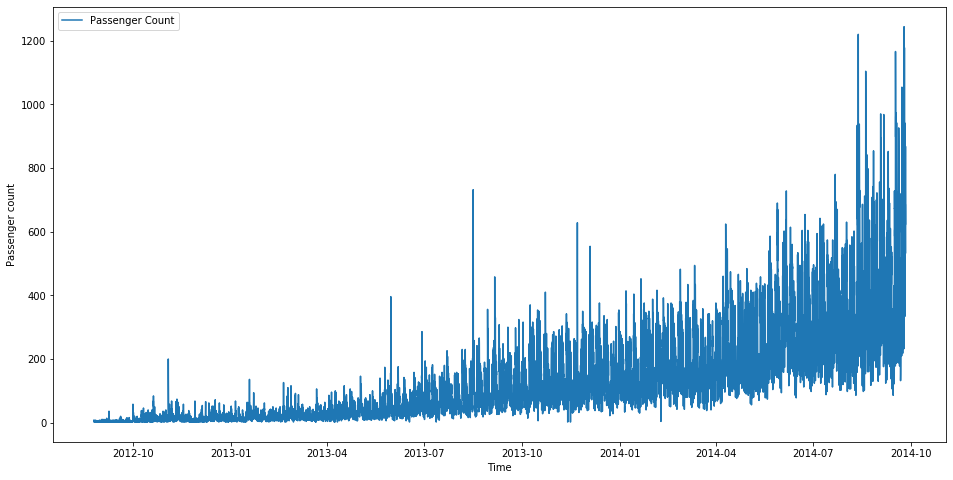

In [24]:
train.index=train.Datetime
df=train.drop(['ID'],1)
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.xlabel('Time')
plt.ylabel('Passenger count')
plt.legend(loc='best')

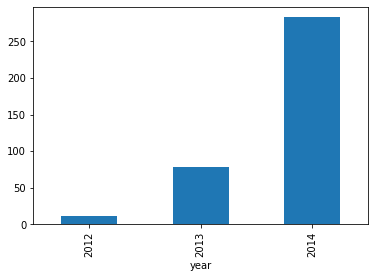

In [25]:
train.groupby(['year'])['Count'].mean().plot.bar()


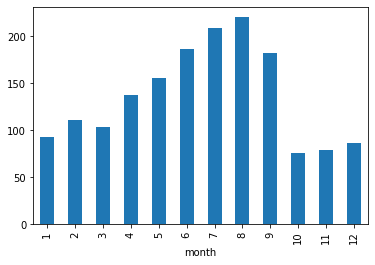

In [26]:
train.groupby(['month'])['Count'].mean().plot.bar()


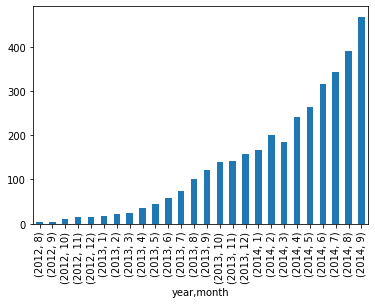

In [27]:
temp=train.groupby(['year','month'])['Count'].mean().plot.bar()


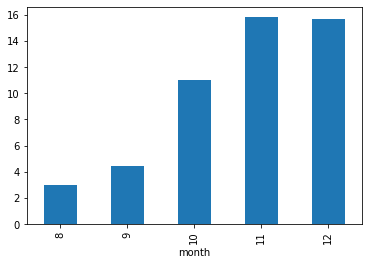

In [28]:
temp=train['2012'].groupby(['month'])['Count'].mean().plot.bar()


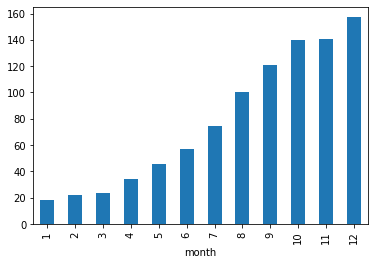

In [29]:
temp=train['2013'].groupby(['month'])['Count'].mean().plot.bar()

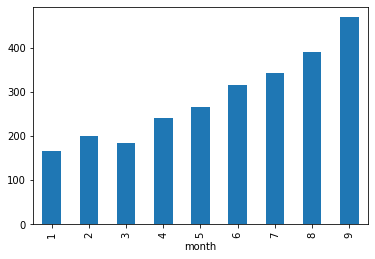

In [30]:
temp=train['2014'].groupby(['month'])['Count'].mean().plot.bar()


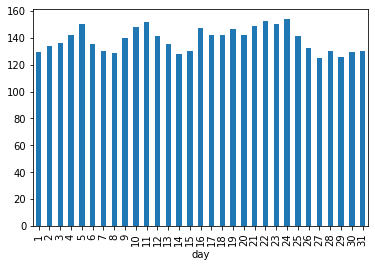

In [31]:
train.groupby(['day'])['Count'].mean().plot.bar()

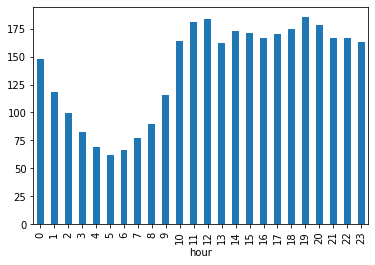

In [32]:
train.groupby(['hour'])['Count'].mean().plot.bar()

In [33]:
train=train.drop('ID',1)
# Hourly mean
hourly=train.resample('H').mean()
# Daily mean
daily=train.resample('D').mean()
# Monthly mean
monthly=train.resample('M').mean()
# Weekly mean
weekly=train.resample('W').mean()
# yearly mean
yearly=train.resample('Y').mean()

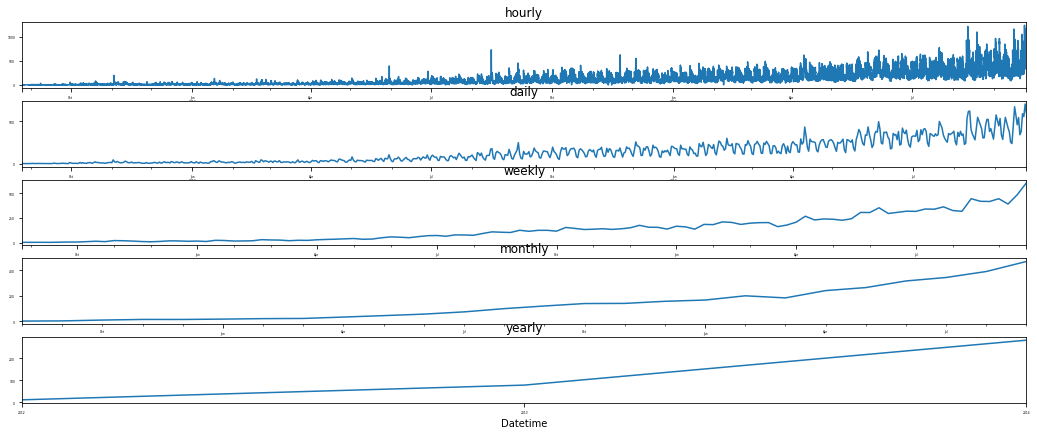

In [34]:
fig,axs=plt.subplots(5,1)
hourly.Count.plot(figsize=(18,7),
     title='hourly',
     fontsize=3,
     ax=axs[0])
daily.Count.plot(figsize=(18,7),
    title='daily',
    fontsize=3,
    ax=axs[1])
weekly.Count.plot(figsize=(18,7),
    title='weekly',
    fontsize=3,
    ax=axs[2])
monthly.Count.plot(figsize=(18,7),
    title='monthly',
    fontsize=3,
    ax=axs[3])
yearly.Count.plot(figsize=(18,7),
    title='yearly',
    fontsize=3,
    ax=axs[4])

In [35]:
Train=train.ix["2012-08-25":"2014-06-24"]
valid=train.ix["2014-06-25":"2014-09-25"]


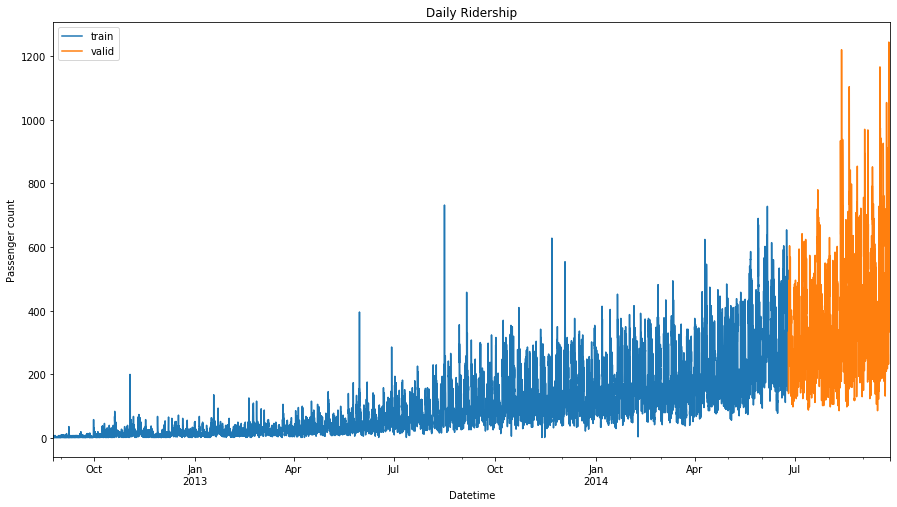

In [93]:
Train.Count.plot(figsize=(15,8),title="Daily Ridership",label='train')
valid.Count.plot(figsize=(15,8),title="Daily Ridership",label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')

Text(0, 0.5, 'Passengers')

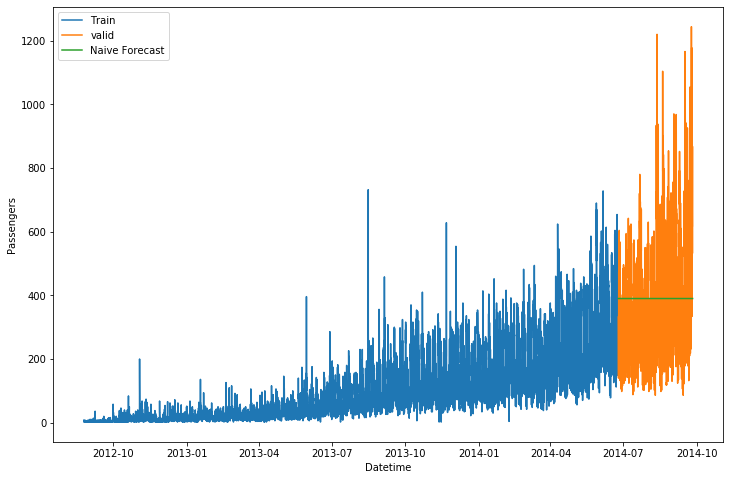

In [94]:
dd=np.asanyarray(Train.Count)
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.xlabel('Datetime')
plt.ylabel('Passengers')

In [95]:
from sklearn.metrics import mean_squared_error
rms=np.sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

186.37368520699056


In [96]:
Train['Count'].rolling(10).mean()[-1]


439.2

Text(0, 0.5, 'Passengers')

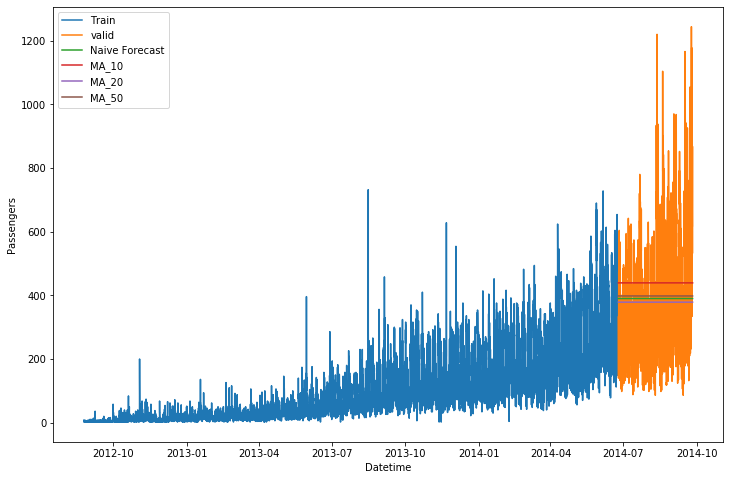

In [98]:
y_hat['MA_10']=Train['Count'].rolling(10).mean()[-1]
y_hat['MA_20']=Train['Count'].rolling(20).mean()[-1]
y_hat['MA_50']=Train['Count'].rolling(50).mean()[-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.plot(y_hat.index,y_hat['MA_10'],label='MA_10')
plt.plot(y_hat.index,y_hat['MA_20'],label='MA_20')
plt.plot(y_hat.index,y_hat['MA_50'],label='MA_50')
plt.legend(loc='best')
plt.xlabel('Datetime')
plt.ylabel('Passengers')

In [99]:
rms =np.sqrt(mean_squared_error(valid.Count, y_hat.MA_10))
print(rms)
rms =np.sqrt(mean_squared_error(valid.Count, y_hat.MA_20))
print(rms)
rms =np.sqrt(mean_squared_error(valid.Count, y_hat.MA_50))
print(rms)

192.93805680435588
186.67900919256638
186.5773761711873


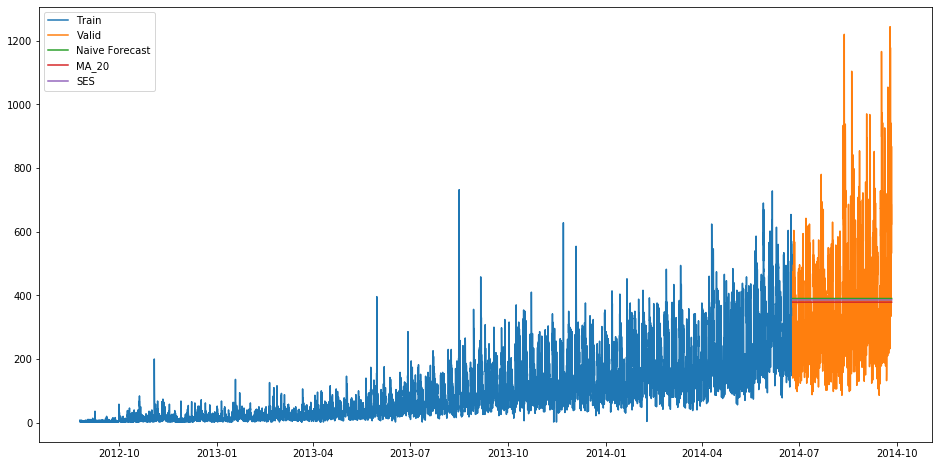

In [42]:
from statsmodels.tsa.api import SimpleExpSmoothing
fit = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES']=fit.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.plot(y_hat.index,y_hat['MA_20'],label='MA_20')
plt.plot(y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [43]:
rms=np.sqrt(mean_squared_error(valid.Count,y_hat.SES))
print(rms)

186.40944652452376


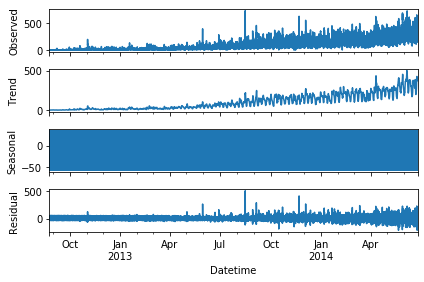

In [100]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

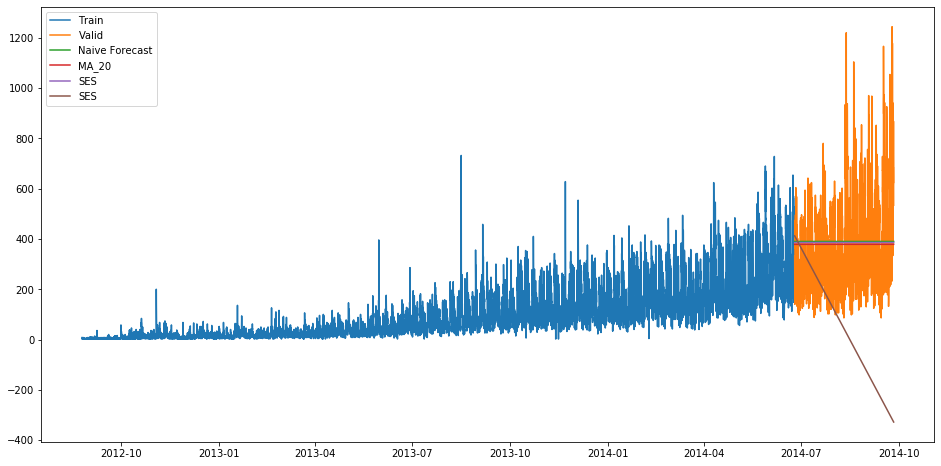

In [46]:
from statsmodels.tsa.api import Holt

fit2 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat['Holt']=fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.plot(y_hat.index,y_hat['MA_20'],label='MA_20')
plt.plot(y_hat['SES'], label='SES')
plt.plot(y_hat['Holt'], label='SES')
plt.legend(loc='best')
plt.show()

In [47]:
rmse=np.sqrt(mean_squared_error(valid.Count,y_hat['Holt']))
print(rmse)

475.09398202897876


In [48]:
submission=pd.read_csv("C:\\Users\\Felicia\\Downloads\sample_submission_LSeus50.csv")

In [49]:
submission.head()

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0


In [107]:
fit3 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
predict=fit3.forecast(len(test))
test['prediction']=predict

In [77]:
train_org['ratio']=train_org['Count']/train_org['Count'].sum()


In [78]:
temp=train_org.groupby(['hour'])['ratio'].sum()


In [79]:
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour',1)

In [104]:
merge=pd.merge(test,test_org,on=('day','month','year'),how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year','month','day','hour_x','hour_y'],axis=1)

In [81]:
prediction=pd.merge(merge, temp2, on='hour', how='left')

In [82]:
prediction=pd.merge(merge,temp2,on='hour',how='left')


In [83]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [84]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1)
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing


In [86]:
y_hat_avg=valid.copy()


In [87]:
fit1=ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add').fit()


In [88]:
y_hat_avg['Holt_Winter']=fit1.forecast(len(valid))


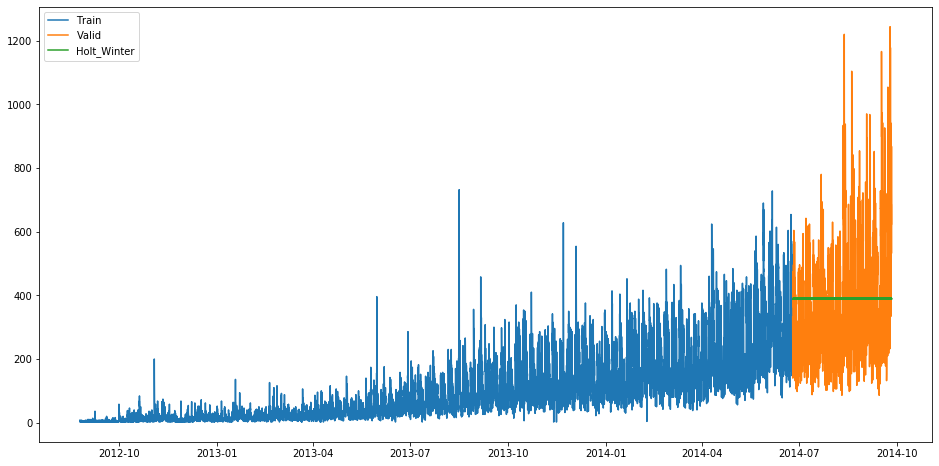

In [106]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [67]:
rms =np.sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

186.35743199832575


In [68]:
predict=fit1.forecast(len(test))

In [69]:
test['prediction']=predict

In [70]:
merge=pd.merge(test, test_org, on=('day','month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month','hour_x','hour_y'], axis=1)

In [71]:
prediction=pd.merge(merge, temp2, on='hour', how='left')

In [72]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [73]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

In [74]:
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

# Conclusions

*Comparing the graph of Hot Winter's Exponential Smoothing with the graph of naive forcasting, they are almost the same. To begin with, I forecasted that the prediction of Hot Winter's Exponential Smoothing would fluctuate within a range. From my perspective, the prediction result is not satisfying.*

*Based on the analysis, and the graphs shown, the dataset does not have an obvious trend in terms of season. Hot Winter's Exponential Smoothing is largely likely not to be a perfit model for it.*

# Additional Notes

In this case, we divided the train dataset into two parts. The dataset is consisted by 36 months in total. We use the former 29 months for traing and the last 3 months for prection. More information can refer to: [Improve Your Model Performance using Cross Validation](https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/)

In this case, we did not conduct data cleaning, and we did not test the stationarity of the dataset. 

**Autoregressive Integrated Moving Average Model** may be a more suitable model for the dataset.